## xcube Data Store Framework - SENTINEL Hub

This notebook walks provides a walk-through demonstrating how to use xcube and the xcube SENTINEL Hub (SH) plugin to read and explore data from SH.

Please note: In order to be able to access data from SENTINEL Hub, you need SENTINEL Hub Credentials.

In [1]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Various utilities
import shapely.geometry
import IPython.display
from IPython.display import JSON
import matplotlib.pyplot as plt


Configure matplotlib to display graphs inline directly in the notebook and set a sensible default figure size.

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 16,12


First, let's have a look at the data accessors. Which data accessors are available?

In [3]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

Usually we need more information to get the actual data store object. Which data store parameters are available?

In [4]:
get_data_store_params_schema('sentinelhub')

Provide mandatory parameters to instantiate the store class:

In [5]:
store = new_data_store('sentinelhub')
store

Which datasets are provided? (the list may contain both gridded and vector datasets):

In [6]:
JSON(list(store.get_data_ids()))

<IPython.core.display.JSON object>

Which "openers" are available? Note, the first part of an opener's name identifies the returned in-memory data type:

- `dataset` --> `xarray.Dataset` (Gridded data)
- `mldataset` -->  `xcube.core.mlds.MultiLevelDataset`  (Gridded data, multi-resolution pyramid)
- `geodataframe` --> `geopandas.GeoDataFrame` (Vector data) 

The first opener is the default opener. In this case there is only a single one:

In [7]:
store.get_data_opener_ids()

('dataset:zarr:sentinelhub',)

Get more info about a dedicated dataset. This include a description of the possible open formats:

In [8]:
store.describe_data('S2L2A')

Which parameters must I pass or are available to open the dataset?

In [9]:
store.get_open_data_params_schema('S2L2A')

There are 4 required parameters, so we need to provide them to open a dataset:

In [10]:
geometry=[9.7, 53.4, 10.2, 53.7]

In [11]:
IPython.display.GeoJSON(shapely.geometry.box(*geometry).__geo_interface__)

<IPython.display.GeoJSON object>

In [12]:
dataset = store.open_data('S2L2A', variable_names=['B01', 'B04', 'B05', 'B08'], 
                          bbox=geometry, 
                          spatial_res=0.00018, 
                          time_range=('2020-08-10T00:00:00+00:00','2020-08-20T00:00:00+00:00'), 
                          time_tolerance='1H')
dataset

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2325, lon: 3873, time: 7)
Coordinates:
  * lat        (lat) float64 53.82 53.82 53.82 53.82 ... 53.4 53.4 53.4 53.4
  * lon        (lon) float64 9.7 9.7 9.7 9.701 9.701 ... 10.4 10.4 10.4 10.4
  * time       (time) datetime64[ns] 2020-08-10T10:46:01 ... 2020-08-20T10:46:01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(7, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    B01        (time, lat, lon) float32 dask.array<chunksize=(1, 775, 1291), meta=np.ndarray>
    B04        (time, lat, lon) float32 dask.array<chunksize=(1, 775, 1291), meta=np.ndarray>
    B05        (time, lat, lon) float32 dask.array<chunksize=(1, 775, 1291), meta=np.ndarray>
    B08        (time, lat, lon) float32 dask.array<chunksize=(1, 775, 1291), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2020-10-13T14:37:47.650236
    processing_level:        L2A
    time_coverage_start:     2020-08-10T10:46:01+00:00
    time_coverage_end:       2020-08-20T10:46:01+00:00
    time_coverage_duration:  P10DT0H0M0S
    geospatial_lon_min:      9.7
    geospatial_lat_min:      53.4
    geospatial_lon_max:      10.39714
    geospatial_lat_max:      53.8185

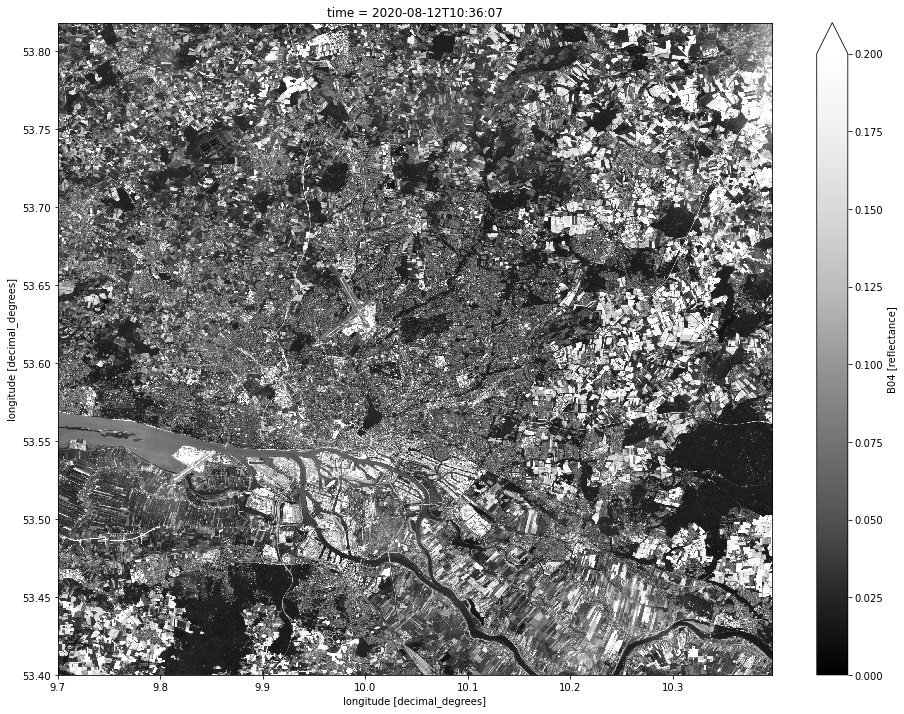

In [13]:
dataset.B04.isel(time=1).plot.imshow(vmin=0, vmax=0.2, cmap='Greys_r')